In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
file_path = "C:\\Users\\tkeo1\\OneDrive\\문서\\카카오톡 받은 파일\\body_out1.csv"
data_review = pd.read_csv(file_path)

## age sex bfmp asmmp tsmmp tbfmp ##

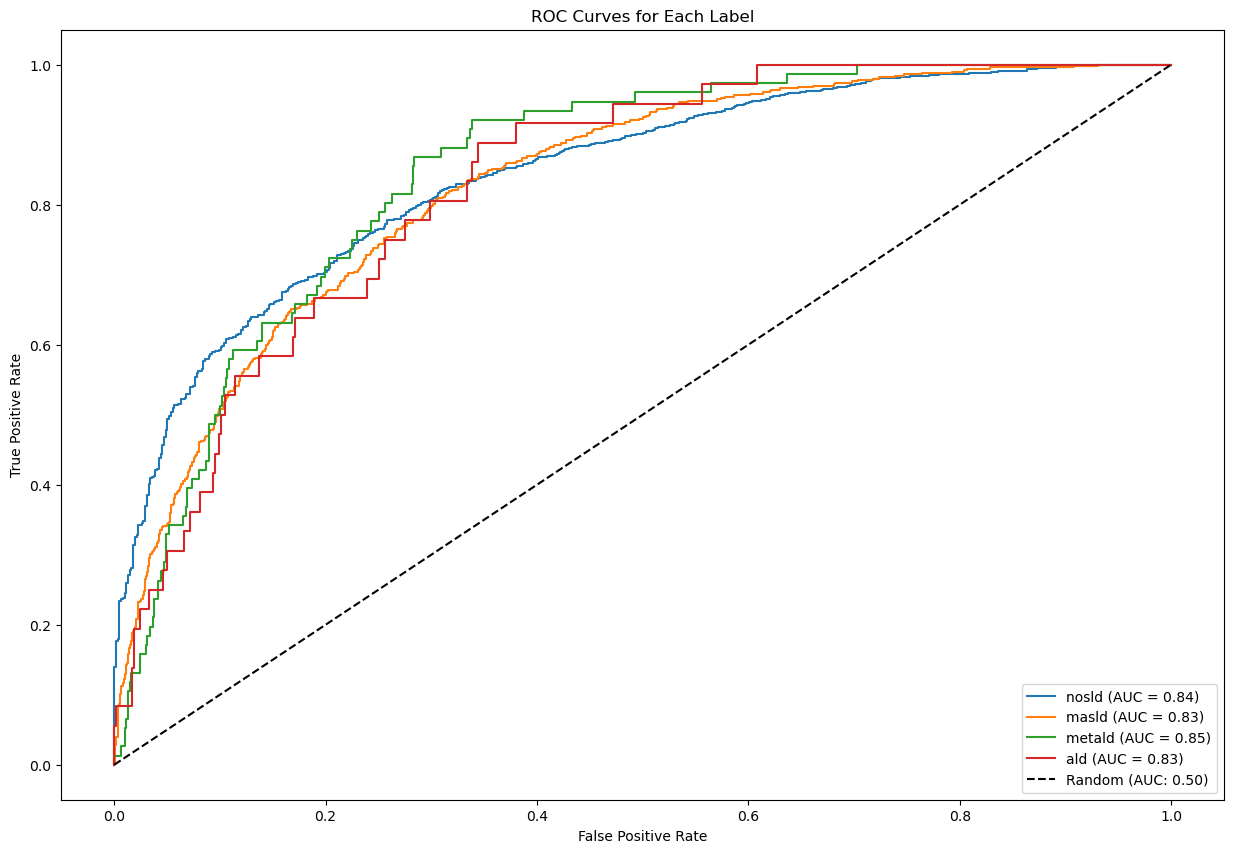

In [12]:
# Define the features and the labels
features = ['age', 'sex', 'bfmp', 'asmmp', 'tsmmp', 'tbfmp']
labels = ['nosld', 'masld', 'metald', 'ald']

X = data_review[features]

# Plot ROC curves for each label
plt.figure(figsize=(15, 10))

for label in labels:
    y = data_review[label]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    clf = LogisticRegression(max_iter=10000)
    clf.fit(X_train, y_train)
    
    # Get the prediction scores
    pred_scores = clf.predict_proba(X_test)[:, 1]
    
    # Compute the ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, pred_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot the diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC: 0.50)')

# Set plot details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Label')
plt.legend(loc='lower right')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Models to be evaluated
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True)  # To enable probability estimates for ROC AUC
}

# Dictionary to store the AUC scores for each model and label
auc_scores = {model_name: {} for model_name in models.keys()}

for label in labels:
    y = data_review[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        pred_scores = model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, pred_scores)
        auc_scores[model_name][label] = auc_score

auc_scores


{'Random Forest': {'nosld': 0.8157434570505636,
  'masld': 0.8002192831983899,
  'metald': 0.7539499895156216,
  'ald': 0.72479302832244},
 'Gradient Boosting': {'nosld': 0.8323344485463775,
  'masld': 0.8184628638519129,
  'metald': 0.8126362969175929,
  'ald': 0.8231100217864924},
 'Support Vector Machine': {'nosld': 0.8320114213197971,
  'masld': 0.7547535184422792,
  'metald': 0.6747955546236108,
  'ald': 0.6040305010893245}}

In [14]:
import xgboost as xgb

# Dictionary to store the AUC scores for XGBoost
auc_scores_xgb = {}

for label in labels:
    y = data_review[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model_xgb.fit(X_train, y_train)
    pred_scores = model_xgb.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, pred_scores)
    auc_scores_xgb[label] = auc_score

auc_scores_xgb


C:\Users\tkeo1\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\tkeo1\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\tkeo1\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\tkeo1\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


{'nosld': 0.8182015953589558,
 'masld': 0.8024788245429456,
 'metald': 0.7732884252463829,
 'ald': 0.7732298474945535}

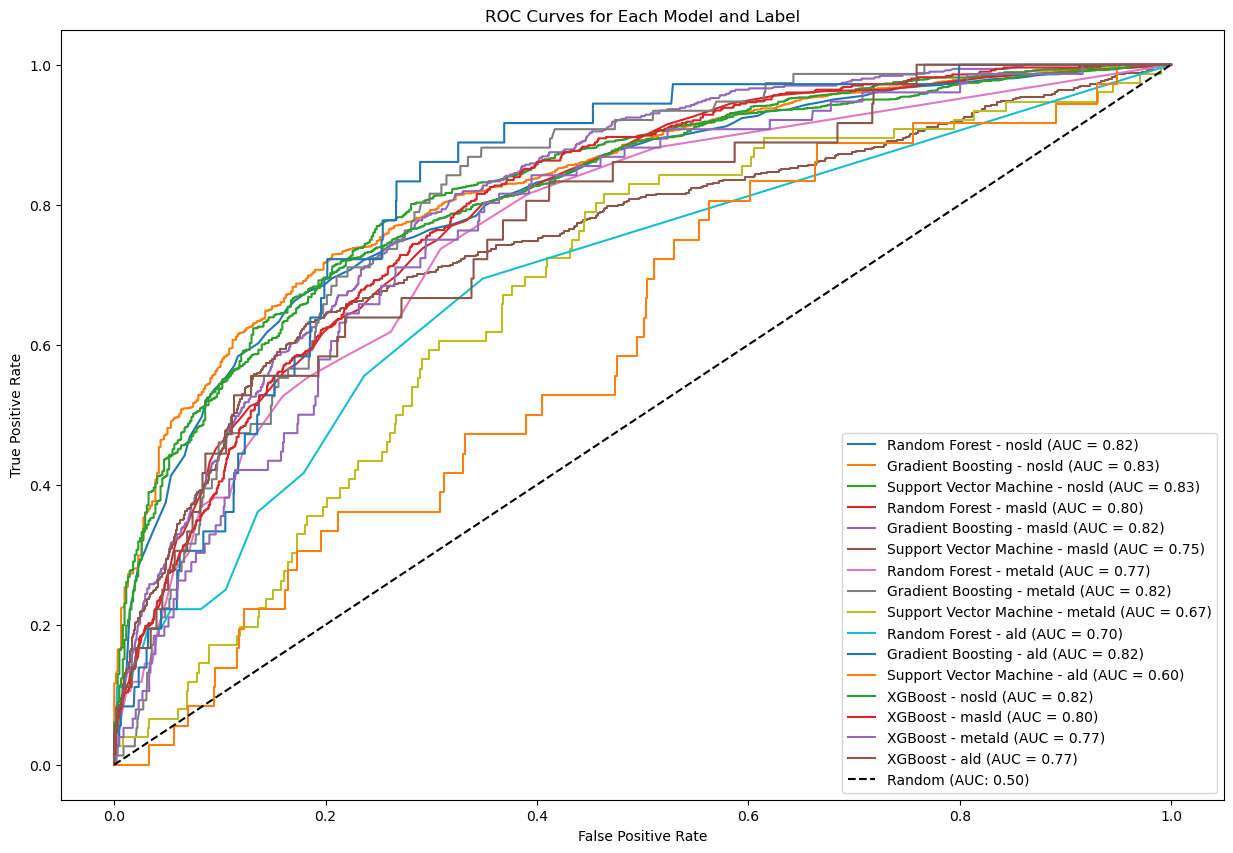

({'Random Forest': {'nosld': 0.8158444030588701,
   'masld': 0.7973512571855511,
   'metald': 0.7662036066261271,
   'ald': 0.6962962962962962},
  'Gradient Boosting': {'nosld': 0.8322619322302063,
   'masld': 0.818464769833646,
   'metald': 0.815176137555043,
   'ald': 0.8231971677559913},
  'Support Vector Machine': {'nosld': 0.8319998846331333,
   'masld': 0.7547535184422792,
   'metald': 0.6747955546236108,
   'ald': 0.6040305010893245}},
 {'nosld': 0.8182015953589558,
  'masld': 0.8024788245429456,
  'metald': 0.7732884252463829,
  'ald': 0.7732298474945535})

In [16]:
# Plot ROC curves for each model and label
plt.figure(figsize=(15, 10))

for label in labels:
    y = data_review[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        pred_scores = model.predict_proba(X_test)[:, 1]
        
        # Compute the ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, pred_scores)
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} - {label} (AUC = {roc_auc:.2f})')
        
        # Update the dictionary with the AUC scores
        auc_scores[model_name][label] = roc_auc

# XGBoost model
for label in labels:
    y = data_review[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model_xgb.fit(X_train, y_train)
    pred_scores = model_xgb.predict_proba(X_test)[:, 1]
    
    # Compute the ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, pred_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve for XGBoost
    plt.plot(fpr, tpr, label=f'XGBoost - {label} (AUC = {roc_auc:.2f})')
    
    # Update the dictionary with the AUC scores for XGBoost
    auc_scores_xgb[label] = roc_auc

# Plot the diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC: 0.50)')

# Set plot details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Model and Label')
plt.legend(loc='lower right')
plt.show()

auc_scores, auc_scores_xgb

## age sex bfms asmms tsmms tbfms ##

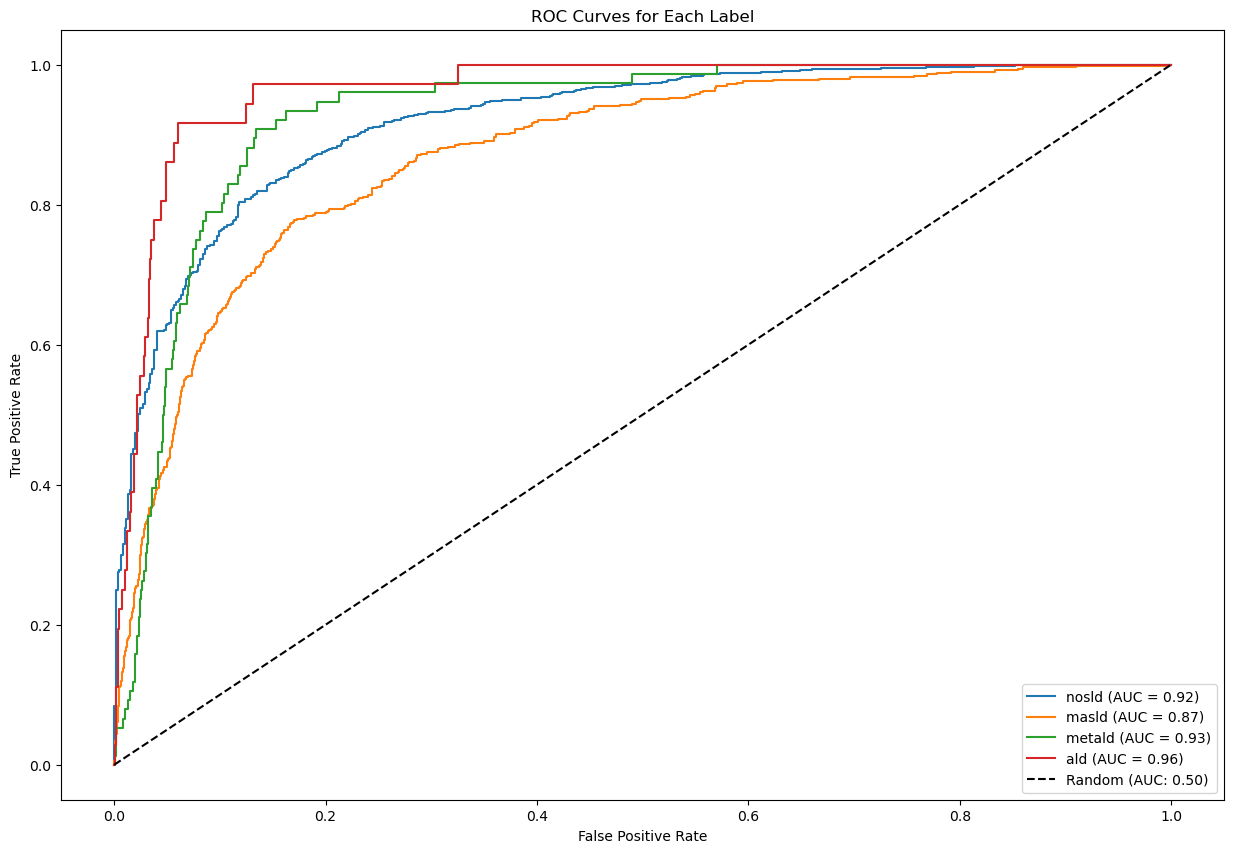

In [18]:
# Define the features and the labels
features = ['age', 'sex', 'bfms', 'asmms', 'tsmms', 'tbfms']
labels = ['nosld', 'masld', 'metald', 'ald']

X = data_review[features]

# Plot ROC curves for each label
plt.figure(figsize=(15, 10))

for label in labels:
    y = data_review[label]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    clf = LogisticRegression(max_iter=10000)
    clf.fit(X_train, y_train)
    
    # Get the prediction scores
    pred_scores = clf.predict_proba(X_test)[:, 1]
    
    # Compute the ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, pred_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot the diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC: 0.50)')

# Set plot details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Label')
plt.legend(loc='lower right')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Models to be evaluated
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True)  # To enable probability estimates for ROC AUC
}

# Dictionary to store the AUC scores for each model and label
auc_scores = {model_name: {} for model_name in models.keys()}

for label in labels:
    y = data_review[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        pred_scores = model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, pred_scores)
        auc_scores[model_name][label] = auc_score

auc_scores


{'Random Forest': {'nosld': 0.8945917661019185,
  'masld': 0.8564176310934235,
  'metald': 0.849030195009436,
  'ald': 0.8701851851851852},
 'Gradient Boosting': {'nosld': 0.8996633759641374,
  'masld': 0.8704385092173277,
  'metald': 0.8814557559236738,
  'ald': 0.8961111111111111},
 'Support Vector Machine': {'nosld': 0.9057510383017997,
  'masld': 0.8535720003659484,
  'metald': 0.5173935835604948,
  'ald': 0.843714596949891}}

In [20]:
import xgboost as xgb

# Dictionary to store the AUC scores for XGBoost
auc_scores_xgb = {}

for label in labels:
    y = data_review[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model_xgb.fit(X_train, y_train)
    pred_scores = model_xgb.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, pred_scores)
    auc_scores_xgb[label] = auc_score

auc_scores_xgb


C:\Users\tkeo1\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\tkeo1\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\tkeo1\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\tkeo1\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


{'nosld': 0.898224998351902,
 'masld': 0.8587367343671378,
 'metald': 0.8783864541832669,
 'ald': 0.926677559912854}

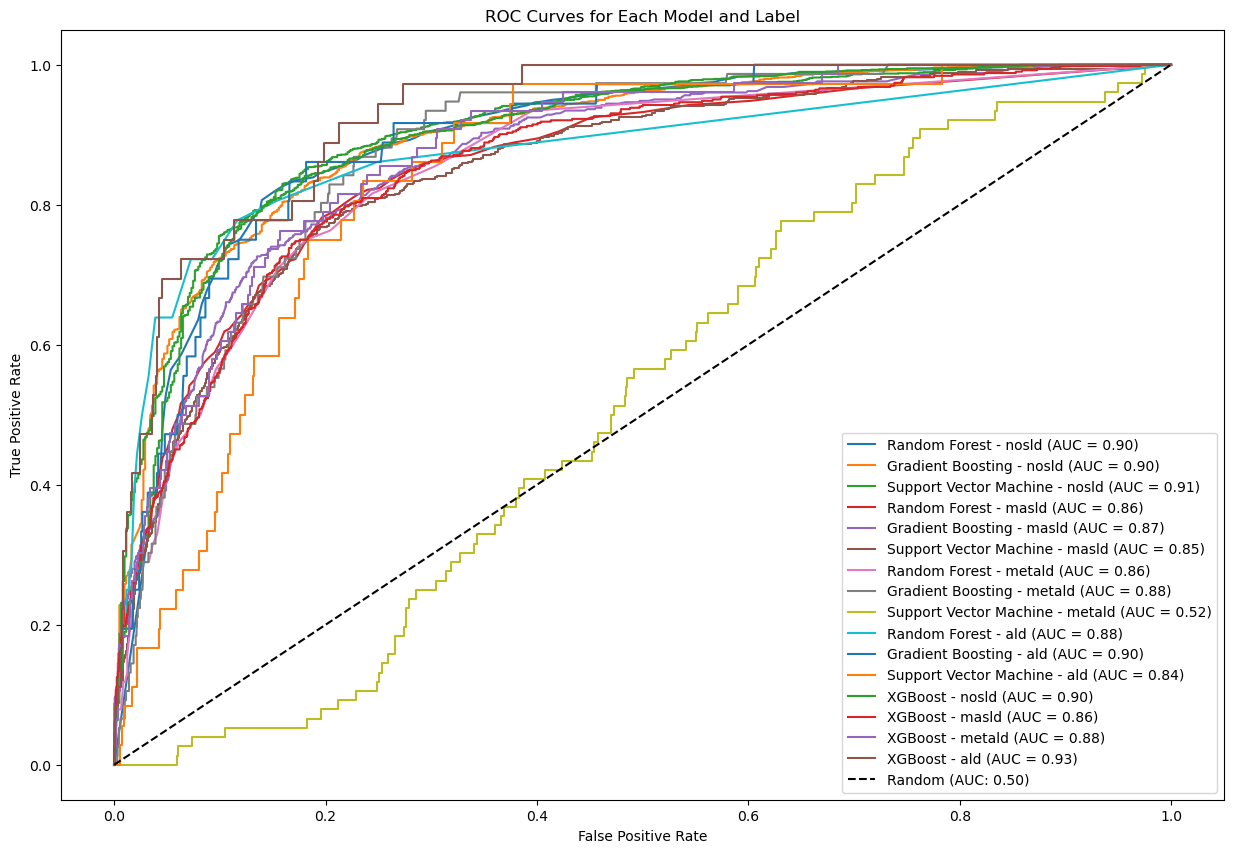

({'Random Forest': {'nosld': 0.8953614279121893,
   'masld': 0.8582097304179437,
   'metald': 0.8566733067729083,
   'ald': 0.876525054466231},
  'Gradient Boosting': {'nosld': 0.8995813830839212,
   'masld': 0.8704547100620588,
   'metald': 0.8814557559236738,
   'ald': 0.8961437908496731},
  'Support Vector Machine': {'nosld': 0.9057518623508471,
   'masld': 0.8535882012106797,
   'metald': 0.5173935835604948,
   'ald': 0.843714596949891}},
 {'nosld': 0.898224998351902,
  'masld': 0.8587367343671378,
  'metald': 0.8783864541832669,
  'ald': 0.926677559912854})

In [21]:
# Plot ROC curves for each model and label
plt.figure(figsize=(15, 10))

for label in labels:
    y = data_review[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        pred_scores = model.predict_proba(X_test)[:, 1]
        
        # Compute the ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, pred_scores)
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} - {label} (AUC = {roc_auc:.2f})')
        
        # Update the dictionary with the AUC scores
        auc_scores[model_name][label] = roc_auc

# XGBoost model
for label in labels:
    y = data_review[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model_xgb.fit(X_train, y_train)
    pred_scores = model_xgb.predict_proba(X_test)[:, 1]
    
    # Compute the ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, pred_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve for XGBoost
    plt.plot(fpr, tpr, label=f'XGBoost - {label} (AUC = {roc_auc:.2f})')
    
    # Update the dictionary with the AUC scores for XGBoost
    auc_scores_xgb[label] = roc_auc

# Plot the diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC: 0.50)')

# Set plot details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Model and Label')
plt.legend(loc='lower right')
plt.show()

auc_scores, auc_scores_xgb